<a href="https://colab.research.google.com/github/lucianosilva-github/visaocomputacional/blob/master/Visa%CC%83o_Computacional_REVISAO_PF_SOLUCOES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **VISÃO COMPUTACIONAL - REVISÃO PARA PF**


#### Nome:

**QUESTÃO 01 (2.0 pontos)** Considere o seguinte programa em OpenCV/Python e sua aplicação na imagem. Descreva brevemente o que faz este programa.

In [58]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
img = cv.imread('jota.png', cv.IMREAD_GRAYSCALE)
_, mask=cv.threshold(img, 230, 255, cv.THRESH_BINARY_INV)
kernel=np.ones((3,3), np.uint8)
imgd=cv.dilate(mask, kernel)
imgc=cv.subtract(imgd,mask)

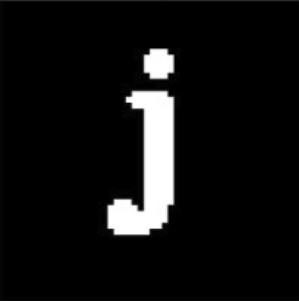

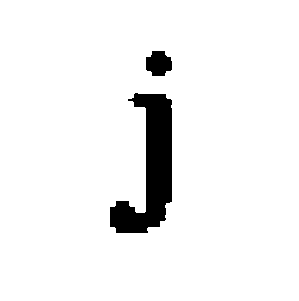

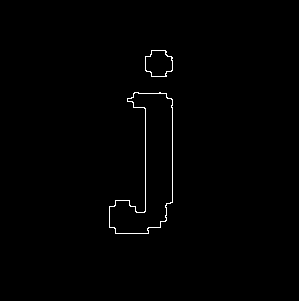

In [59]:
cv2_imshow(img)
cv2_imshow(imgd)
cv2_imshow(imgc)

In [65]:
imge=cv.erode(mask, kernel)
imgc=cv.subtract(mask,imge)

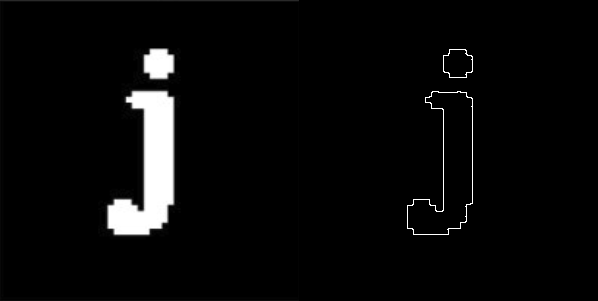

In [66]:
cv2_imshow(np.hstack([img, imgc]))

In [ ]:
#o procedimento calcula o contorno da imagem img

**QUESTÃO 02 (2.0 pontos)** O código abaixo exibe uma imagem BGR, com acesso a um pixel individual. 

[202 206 168]


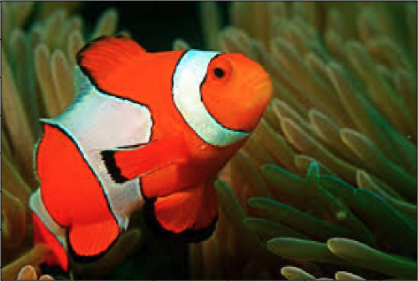

In [3]:
import cv2 as cv
import numpy as np
nemo = cv.imread('nemo.png')
print(nemo[100][100])
cv2_imshow(nemo)

Modifique este código para segmentar somente a parte laranja do peixe, produzindo um resultado semelhante ao mostrado abaixo. Observe que, na imagem original, temos vários tons de laranja.



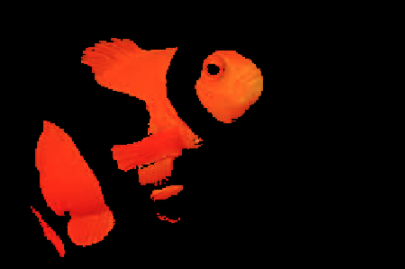

In [4]:
seg = cv.imread('seg.png')
cv2_imshow(seg)

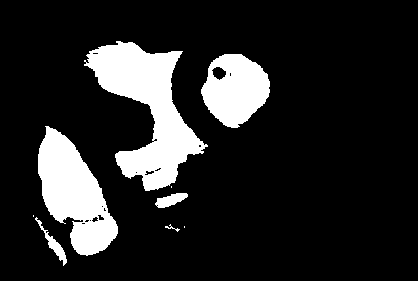

In [67]:
#converter de BGR para RGB
nemorgb = cv.cvtColor(nemo, cv.COLOR_BGR2RGB)
#converter imagem para HSV
hsv_nemo = cv.cvtColor(nemorgb, cv.COLOR_RGB2HSV)
#definir limites mínimos e máximos para os valores da cor laranja
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)
#segmentar a imagem pelas cores
mask = cv.inRange(hsv_nemo, light_orange, dark_orange)
cv2_imshow(mask)

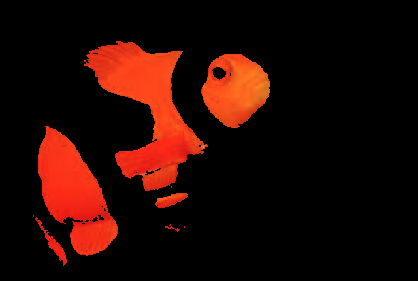

In [68]:
#usar máscara para segmentar
w,h,_=nemo.shape
for i in range(0,w):
  for j in range(0,h):
    if mask[i,j]!=255: #mantemos somente as cores correspondentes às máscaras
      nemo[i,j]=0
cv2_imshow(nemo)

**QUESTÃO 03(3.0 pontos)** Abaixo, temos duas notas e duas moedas do sistema financeiro brasileiro. Partindo da leitura da imagem abaixo, faça a segmentação das moedas e das notas. As moedas devem ser identificadas por círculos e, as notas, por retângulos.


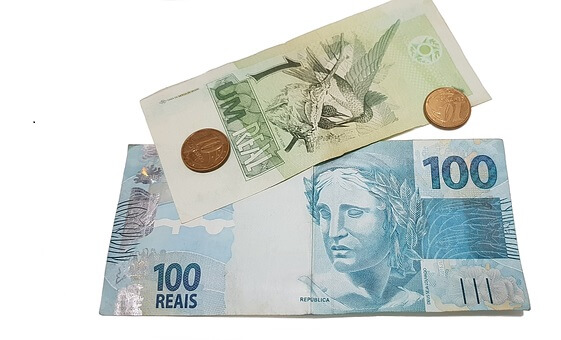

In [20]:
import cv2 as cv
import numpy as np

img = cv.imread('notasmoedas.jpg')
cv2_imshow(img)

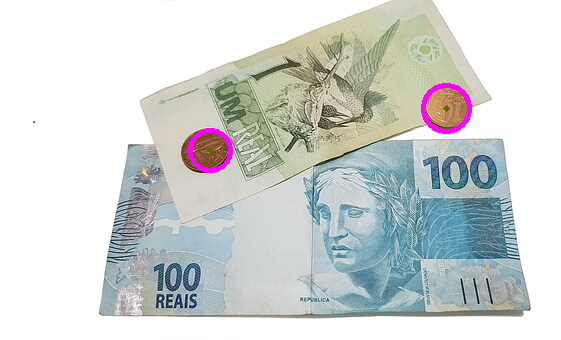

In [74]:
img = cv.imread('notasmoedas.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.medianBlur(gray, 7)
rows = gray.shape[0]
#Documentação de HoughCircles: https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows / 8,param1=100, param2=30, minRadius=8, maxRadius=46)
if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            # centro do círculo
            cv.circle(img, center, 1, (0, 100, 100), 3)
            # contorno do círculo
            radius = i[2]
            cv.circle(img, center, radius, (255, 0, 255), 3)
cv2_imshow(img)

#para as cédulas: pesquisar sobre HoughLines
#documentação HoughLines: https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html


In [ ]:
#implemente sua solução aqui

**QUESTÃO 04 (3.0 pontos)** Utilizando equipamento Kinect (do Microsoft XBox), podemos produzir pares de imagens para visão estéreo, conforme setup mostrado abaixo:

<img src="https://www.researchgate.net/profile/Eung-Joo_Lee/publication/280572912/figure/fig1/AS:284452010905600@1444830052193/Stereo-vision-based-system-with-two-Kinect-sensors_W640.jpg"></img>

Abaixo, temos duas imagens geradas por um setup destes (esquerda e direita).A partir destas duas imagens, construa e exiba um mapa de profundidade desta sala. 



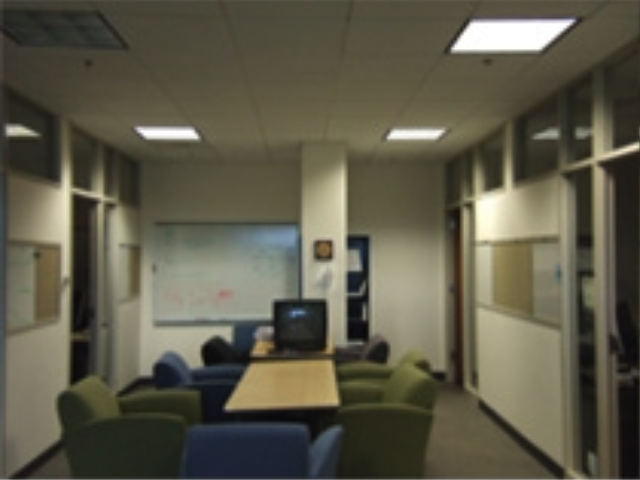

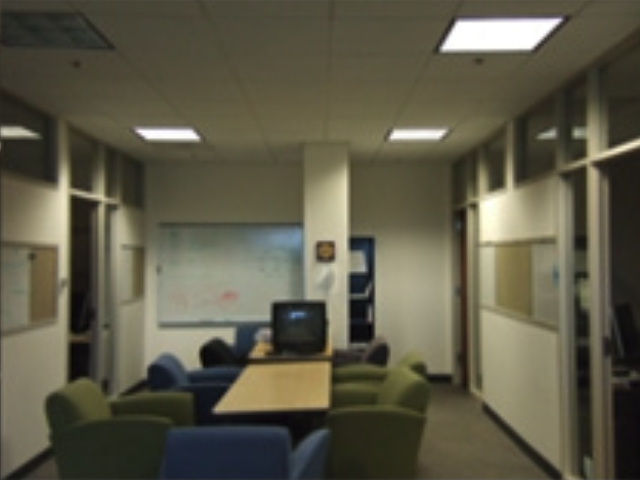

In [ ]:
left = cv.imread('left.png')
cv2_imshow(left)
right = cv.imread('right.png')
cv2_imshow(right)

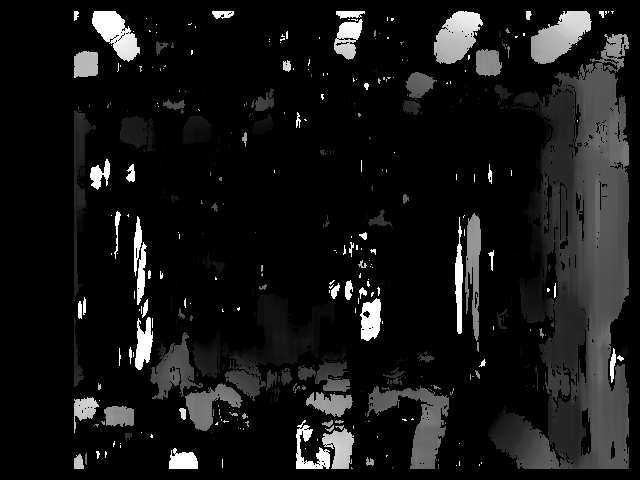

In [84]:
imgL = cv.imread('left.png',0)
imgR = cv.imread('right.png',0)
stereo = cv.StereoBM_create(numDisparities=64, blockSize=23)
disparity = stereo.compute(imgL,imgR)
cv2_imshow(disparity)